# Case Of Study

## Imports

In [1]:
from Tools import *
import pandas as pd
import matplotlib.pyplot as plt

# import pyautogui
# import subprocess
# import time

## Paths

In [6]:
path_ntw = '/content/bus68/bus68.ntw'
path_dyn = '/content/bus68/bus68.dyn'
path_evt = '/content/bus68/bus68.evt'
path_plv = '/content/bus68/bus68.plv'
path_wfs = '/content/bus68/bus68_'

In [7]:
ND = NetworkData(path=path_ntw)
DD = DynamicData(path=path_dyn)

In [8]:
ND.networkInfo(show=True)

 ====================== Network Info ====================== 
 ======================== GENERATOR ======================= 

 Total Active Power:   17787.5320 MW
 Total Reactive Power:  2496.0030 MVar

 Total Max Active Power: 22234.4150 MW
 Total Min Active Power:     0.0000 MW

 Total Renew Active Power:     0.0000 MW
 Total Sync Active Power:  17787.5320 MW

 Total Headroom:              4446.8830 MW
 Total Max Unblocked Power:  22234.4150 MW
 Total Head Unblocked Power:  4446.8830 MW

 Renewable Penetration: 0.0000 %

 Total Max Unblocked Power:  22234.4150 MW
 Total Max Blocked Power:        0.0000 MW

 Total Unblocked Power:  17787.5320 MW
 Total Blocked Power:        0.0000 MW
 ========================== LOAD ========================== 

 Total Active Power:   17620.7000 MW
 Total Reactive Power:  2021.7600 MVar




In [ ]:
ND.networkInfo(show=False)

print(f'Potência Máxima de Geração: {ND.total_PMAX_MW:9.3f} MW')
print(f'Potência Total:             {ND.total_PG_MW:9.3f} MW')
print(f'Carga Total:                {ND.total_PL_MW:9.3f} MW\n')

print(f'Percentual da potência máxima em relação à carga: {(ND.total_PL_MW*100)/ND.total_PMAX_MW:5.3f} %')

Potência Máxima de Geração: 22234.415 MW
Potência Total:             17787.532 MW
Carga Total:                17620.700 MW

Percentual da potência máxima em relação à carga: 79.250 %


In [ ]:
porcentagens               = [(i*5)for i in range(2, 19)]
patamares_de_carga         = [(i*0.05)*ND.total_PMAX_MW for i in range(2, 19)]
multiplicadores_de_carga   = [carga/ND.total_PL_MW for carga in patamares_de_carga]

In [ ]:
for multiplicador_carga, porcentagem in zip(multiplicadores_de_carga, porcentagens):

    ND = NetworkData(path=path_ntw)
    ND.changeLoad(param='PL_MW', multi=multiplicador_carga, spec=None, arre=2, keepFP=True)
    
    ND.DF_gen['PG_MW'] = ND.DF_gen['PG_MW']*multiplicador_carga
    
    
    ND.save(save_path=path_ntw.split('.')[0] + '_' + str(porcentagem) + '.ntw')

In [ ]:
var = []
for porcentagem in porcentagens:
    
    path = path_ntw.split('.')[0] + '_' + str(porcentagem) + '.ntw'
    ND   = NetworkData(path=path)
    
    ND.networkInfo(show=False)
    
    per_carga, per_gera = (ND.total_PL_MW*100)/ND.total_PMAX_MW, (ND.total_PG_MW*100)/ND.total_PMAX_MW
    
    print(f'{porcentagem:2} % | CARGA: {ND.total_PL_MW:9.3f} MW ({per_carga:4.1f} %) | GERAÇÃO: {ND.total_PG_MW:9.3f} MW ({per_gera:4.1f} %)')
    
    var.append([porcentagem, ND.total_PL_MW, ND.total_PG_MW, ND.total_PMAX_MW])
    

10 % | CARGA:  2223.442 MW (10.0 %) | GERAÇÃO:  2244.493 MW (10.1 %)
15 % | CARGA:  3335.162 MW (15.0 %) | GERAÇÃO:  3366.739 MW (15.1 %)
20 % | CARGA:  4446.883 MW (20.0 %) | GERAÇÃO:  4488.986 MW (20.2 %)
25 % | CARGA:  5558.604 MW (25.0 %) | GERAÇÃO:  5611.232 MW (25.2 %)
30 % | CARGA:  6670.325 MW (30.0 %) | GERAÇÃO:  6733.479 MW (30.3 %)
35 % | CARGA:  7782.045 MW (35.0 %) | GERAÇÃO:  7855.725 MW (35.3 %)
40 % | CARGA:  8893.766 MW (40.0 %) | GERAÇÃO:  8977.972 MW (40.4 %)
45 % | CARGA: 10005.487 MW (45.0 %) | GERAÇÃO: 10100.218 MW (45.4 %)
50 % | CARGA: 11117.207 MW (50.0 %) | GERAÇÃO: 11222.465 MW (50.5 %)
55 % | CARGA: 12228.928 MW (55.0 %) | GERAÇÃO: 12344.711 MW (55.5 %)
60 % | CARGA: 13340.649 MW (60.0 %) | GERAÇÃO: 13466.958 MW (60.6 %)
65 % | CARGA: 14452.370 MW (65.0 %) | GERAÇÃO: 14589.204 MW (65.6 %)
70 % | CARGA: 15564.091 MW (70.0 %) | GERAÇÃO: 15711.451 MW (70.7 %)
75 % | CARGA: 16675.811 MW (75.0 %) | GERAÇÃO: 16833.697 MW (75.7 %)
80 % | CARGA: 17787.532 MW (80.0 %

In [ ]:
DF_Power = pd.DataFrame(var, columns=['Porcentagem', 'Carga Total', 'Geração Total', 'Geração Máxima'])

In [ ]:
ED = EventData(time=30)

geradores = ND.DF_gen['BUS_ID'].values
names     = []

for idx, gen in enumerate(geradores):

    ED.new_event(name='GenLoss_' + str(gen), evento=18, info1=gen, param1=1,
                 time=1, info2=0, info3=0, param2=0, param3=0)
    names.append('GenLoss_' + str(gen))
    
    if idx != len(geradores)-1:
        for gen_2 in geradores[idx+1:]:
            
            ED.new_event(name='GenLoss_' + str(gen) + '_' + str(gen_2), evento=18, info1=gen,
                         param1=1, time=1, info2=0, info3=0, param2=0, param3=0)
            
            ED.append(n_event=len(ED.events), evento=18, info1=gen_2, param1=1,
                      time=1.5, info2=0, info3=0, param2=0, param3=0)
            
            names.append('GenLoss_' + str(gen) + '_' + str(gen_2))

ED.save(path_evt)

In [ ]:
VD = VariablesData()

barras    = ND.DF_bus['BUS_ID'].values
geradores = ND.DF_gen['BUS_ID'].values

for barra in barras:
    
    VD.new_variable(var='Freq(Hz)', tipo='BUS', barra1=barra, eqp1=0, barra2=0, eqp2=0, multiplier=1)
    
for gerador in geradores:
    
    VD.new_variable(var='Pe(pu)', tipo='SM', barra1=gerador, eqp1=1, barra2=0, eqp2=0, multiplier=1)
    

In [ ]:
VD.new_plot(name='Frequency', variable_number=[i for i in range(1, 69)])
VD.new_plot(name='Electric Power', variable_number=[i for i in range(69, 85)])

VD.save(path_plv)

In [ ]:
for porcentagem in porcentagens:
    
    files = ['bus68_' + str(porcentagem) + '.ntw', 'bus68.dyn', 'bus68.evt']    
    WorkData(save_path=path_wfs + str(porcentagem) + '.dsa', lista=files)
    
    files = ['bus68_' + str(porcentagem) + '.ntw', 'bus68.dyn', 'bus68.evt', 'bus68.plv']    
    WorkData(save_path=path_wfs + str(porcentagem) + '.wfs', lista=files)

In [ ]:
path_script = 'C:/Users/Scarlet/Desktop/Case/Data/RST_automation.txt'

with open(path_script, 'w') as f:
    for porcentagem in porcentagens:
        f.write('Open "' + path_wfs + str(porcentagem) + '.dsa"')
        f.write('\n')
        f.write('DSA DOP')
        f.write('\n')

In [ ]:
# names = ['Evento_' + str(i) for i in range(1, 14)]

for name in names:

    # Run Simulation

    b = pyautogui.locateOnScreen('C:/Users/Scarlet/Desktop/Case/Ref/Ref1.PNG')
    w, h = b.width / 2 + b.left, b.height / 2 + b.top
    pyautogui.click(w, h, duration=0.25)
    time.sleep(1)

    # Right click on the 

    wh = pyautogui.size()
    w, h = wh.width/2, wh.height/2 - 200
    pyautogui.moveTo(w, h, duration=0.25)
    pyautogui.rightClick()
    time.sleep(1)

    # Click in 'export .plt'

    b = pyautogui.locateOnScreen('C:/Users/Scarlet/Desktop/Case/Ref/Ref2.png')
    w, h = b.width / 2 + b.left, b.height / 2 + b.top
    pyautogui.click(w, h, duration=0.25)
    time.sleep(1)

    # Write the name and save

    pyautogui.write(name)
    time.sleep(1)
    pyautogui.write(['enter'])
    time.sleep(1)

    if name != names[-1]:

        # Click in events's names

        b = pyautogui.locateOnScreen('C:/Users/Scarlet/Desktop/Case/Ref/Ref1.PNG')
        w, h = b.width / 2 + b.left + 100, b.height / 2 + b.top
        pyautogui.click(w, h, duration=0.25)
        time.sleep(1)

        # Select Next event

        time.sleep(1)
        pyautogui.write(['down'])
        time.sleep(1)
        pyautogui.write(['enter'])
        time.sleep(1)

In [ ]:
plot_10_GenLoss1  = 'C:/Users/Scarlet/Desktop/Case/Plots/bus68_10/GenLoss_1.plt'
plot_10_GenLoss16 = 'C:/Users/Scarlet/Desktop/Case/Plots/bus68_10/GenLoss_16.plt'
plot_90_GenLoss1  = 'C:/Users/Scarlet/Desktop/Case/Plots/bus68_90/GenLoss_1.plt'
plot_90_GenLoss16 = 'C:/Users/Scarlet/Desktop/Case/Plots/bus68_90/GenLoss_16.plt'

In [ ]:
PR_10_GenLoss1  = PlotReader(path=plot_10_GenLoss1,  tipo="Organon")
PR_10_GenLoss16 = PlotReader(path=plot_10_GenLoss16, tipo="Organon")
PR_90_GenLoss1  = PlotReader(path=plot_90_GenLoss1,  tipo="Organon")
PR_90_GenLoss16 = PlotReader(path=plot_90_GenLoss16, tipo="Organon")

In [ ]:
labels = list(PR_10_GenLoss1.var_dic.keys())

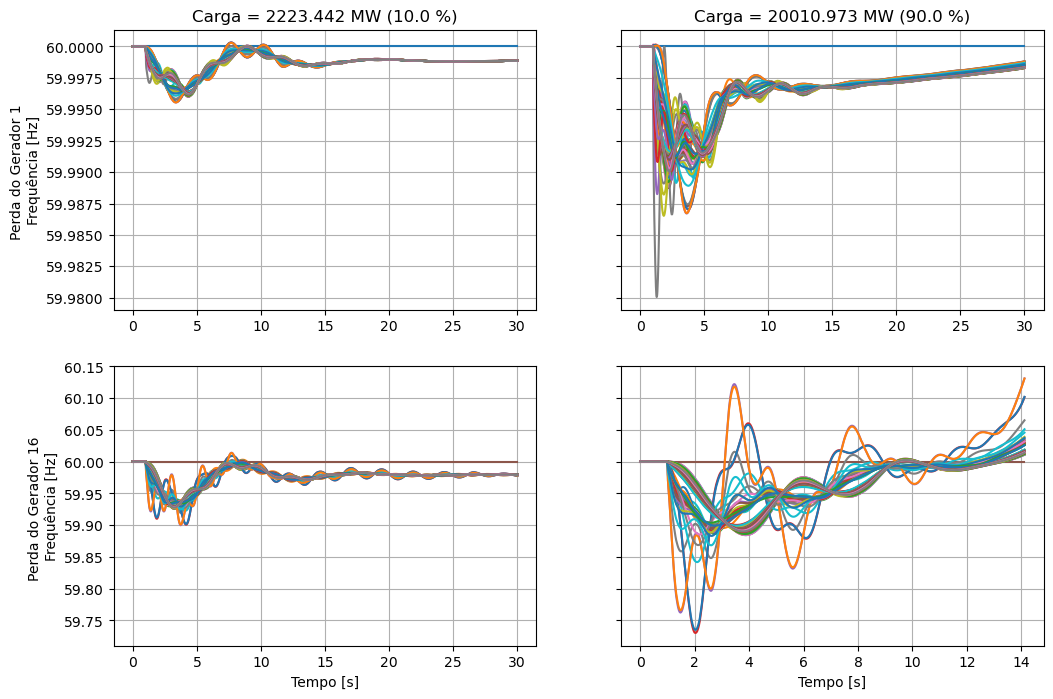

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,8), sharey='row')

for i in range(1,69):

    ax[0, 0].plot(PR_10_GenLoss1.var_dic[labels[0]], PR_10_GenLoss1.var_dic[labels[i]])
    ax[0, 0].ticklabel_format(useOffset=False)
    ax[0, 0].grid(True)
    
    ax[0, 1].plot(PR_90_GenLoss1.var_dic[labels[0]], PR_90_GenLoss1.var_dic[labels[i]])
    ax[0, 1].ticklabel_format(useOffset=False)
    ax[0, 1].grid(True)
    
    ax[1, 0].plot(PR_10_GenLoss16.var_dic[labels[0]], PR_10_GenLoss16.var_dic[labels[i]])
    ax[1, 0].ticklabel_format(useOffset=False)
    ax[1, 0].grid(True)
    
    ax[1, 1].plot(PR_90_GenLoss16.var_dic[labels[0]], PR_90_GenLoss16.var_dic[labels[i]])
    ax[1, 1].ticklabel_format(useOffset=False)
    ax[1, 1].grid(True)

ax[0, 0].set_title('Carga = 2223.442 MW (10.0 %)')  
ax[0, 1].set_title('Carga = 20010.973 MW (90.0 %)')  

ax[0, 0].set_ylabel("Perda do Gerador 1 \nFrequência [Hz]")
ax[1, 0].set_ylabel("Perda do Gerador 16 \nFrequência [Hz]")

ax[1, 0].set_xlabel("Tempo [s]")
ax[1, 1].set_xlabel("Tempo [s]")


plt.show()

In [ ]:
rst_path = 'C:/Users/Scarlet/Desktop/Case/RST/'
names    = ["bus68_" + str(i*5) for i in range(2, 19)]

In [ ]:
RR = RST_Reader(path=rst_path, names=names)

In [ ]:
cenarios, data = RR.createCenarios()

In [ ]:
.sort_values(by='Event').reset_index(drop=True)

In [ ]:
data[data['Event'] == 'GenLoss_1']

,File,Event,STAB_index,STAB_bus1,STAB_bus2,STAB_bus3,STAB_island,DAMP_damp,DAMP_bus,DAMP_island,...,NDRC_hz,NDRC_time,NDRC_inertia,NDRB_hz,NDRB_time,INRT_s,PGTM_value0,PGTM_value1,PGTM_value4,PGTM_valuef
0,bus68_10,GenLoss_1,0.000,8,0,0,1,0.227,5,1,...,0.0035,3.766,8285.97,0.0045,3.254,8472.446,2237.939,2216.207,2251.680,2239.573
136,bus68_15,GenLoss_1,0.002,8,0,0,1,0.185,4,1,...,0.0050,3.726,8285.97,0.0064,3.310,8472.446,3351.956,3319.391,3369.071,3353.197
272,bus68_20,GenLoss_1,0.004,8,0,0,1,0.073,14,1,...,0.0063,3.720,8285.97,0.0082,3.311,8472.446,4467.161,4422.529,4485.958,4467.368
405,bus68_25,GenLoss_1,0.005,8,0,0,1,0.069,14,1,...,0.0075,3.699,8285.97,0.0099,3.290,8472.446,5583.587,5527.197,5602.685,5581.957
538,bus68_40,GenLoss_1,0.007,8,0,0,1,0.071,14,1,...,0.0103,3.639,8285.97,0.0138,3.303,8472.446,8940.611,8846.546,8948.942,8927.978
665,bus68_45,GenLoss_1,0.008,8,0,0,1,0.064,14,1,...,0.0110,3.616,8285.97,0.0148,3.309,8472.446,10062.386,9954.951,10063.703,10043.963
786,bus68_50,GenLoss_1,0.009,8,0,0,1,0.075,14,1,...,0.0115,3.610,8285.97,0.0157,3.303,8472.446,11185.665,11065.579,11178.169,11160.177
903,bus68_55,GenLoss_1,0.005,8,0,0,1,0.076,14,1,...,0.0118,3.604,8285.97,0.0163,3.335,8472.446,12310.543,12176.882,12291.886,12276.579
1019,bus68_60,GenLoss_1,0.005,8,0,0,1,0.073,14,1,...,0.0120,3.609,8285.97,0.0168,3.340,8472.446,13437.134,13289.373,13405.819,13393.026
1133,bus68_65,GenLoss_1,0.006,8,0,0,1,0.085,14,1,...,0.0121,3.629,8285.97,0.0171,3.341,8472.446,14565.583,14402.300,14519.184,14509.386


In [ ]:
porcentagens = [(i*5)for i in range(2, 19)]
var = []
for porcentagem in porcentagens:
    
    path = path_ntw.split('.')[0] + '_' + str(porcentagem) + '.ntw'
    ND   = NetworkData(path=path)
    
    ND.networkInfo(show=False)
    
    per_carga, per_gera = (ND.total_PL_MW*100)/ND.total_PMAX_MW, (ND.total_PG_MW*100)/ND.total_PMAX_MW
    
    print(f'{porcentagem:2} % | CARGA: {ND.total_PL_MW:9.3f} MW ({per_carga:4.1f} %) | GERAÇÃO: {ND.total_PG_MW:9.3f} MW ({per_gera:4.1f} %)')
    
    var.append([porcentagem, ND.total_PL_MW, ND.total_PG_MW, ND.total_PMAX_MW])

10 % | CARGA:  2223.442 MW (10.0 %) | GERAÇÃO:  2244.493 MW (10.1 %)
15 % | CARGA:  3335.162 MW (15.0 %) | GERAÇÃO:  3366.739 MW (15.1 %)
20 % | CARGA:  4446.883 MW (20.0 %) | GERAÇÃO:  4488.986 MW (20.2 %)
25 % | CARGA:  5558.604 MW (25.0 %) | GERAÇÃO:  5611.232 MW (25.2 %)
30 % | CARGA:  6670.325 MW (30.0 %) | GERAÇÃO:  6733.479 MW (30.3 %)
35 % | CARGA:  7782.045 MW (35.0 %) | GERAÇÃO:  7855.725 MW (35.3 %)
40 % | CARGA:  8893.766 MW (40.0 %) | GERAÇÃO:  8977.972 MW (40.4 %)
45 % | CARGA: 10005.487 MW (45.0 %) | GERAÇÃO: 10100.218 MW (45.4 %)
50 % | CARGA: 11117.207 MW (50.0 %) | GERAÇÃO: 11222.465 MW (50.5 %)
55 % | CARGA: 12228.928 MW (55.0 %) | GERAÇÃO: 12344.711 MW (55.5 %)
60 % | CARGA: 13340.649 MW (60.0 %) | GERAÇÃO: 13466.958 MW (60.6 %)
65 % | CARGA: 14452.370 MW (65.0 %) | GERAÇÃO: 14589.204 MW (65.6 %)
70 % | CARGA: 15564.091 MW (70.0 %) | GERAÇÃO: 15711.451 MW (70.7 %)
75 % | CARGA: 16675.811 MW (75.0 %) | GERAÇÃO: 16833.697 MW (75.7 %)
80 % | CARGA: 17787.532 MW (80.0 %

In [ ]:
data.columns

Index(['File', 'Event', 'STAB_index', 'STAB_bus1', 'STAB_bus2', 'STAB_bus3',
       'STAB_island', 'DAMP_damp', 'DAMP_bus', 'DAMP_island', 'RoCoF',
       'NDRC_hz', 'NDRC_time', 'NDRC_inertia', 'NDRB_hz', 'NDRB_time',
       'INRT_s', 'PGTM_value0', 'PGTM_value1', 'PGTM_value4', 'PGTM_valuef'],
      dtype='object')

In [ ]:
complete = pd.DataFrame()

for event in data['Event'].unique():
    
    filtro = data['Event'] == event
    
    if len(data[filtro]) >= 15:
        complete = pd.concat([complete, data[filtro]], axis=0)

In [ ]:
complete

,File,Event,STAB_index,STAB_bus1,STAB_bus2,STAB_bus3,STAB_island,DAMP_damp,DAMP_bus,DAMP_island,...,NDRC_hz,NDRC_time,NDRC_inertia,NDRB_hz,NDRB_time,INRT_s,PGTM_value0,PGTM_value1,PGTM_value4,PGTM_valuef
0,bus68_10,GenLoss_1,0.000,8,0,0,1,0.227,5,1,...,0.0035,3.766,8285.97,0.0045,3.254,8472.446,2237.939,2216.207,2251.680,2239.573
136,bus68_15,GenLoss_1,0.002,8,0,0,1,0.185,4,1,...,0.0050,3.726,8285.97,0.0064,3.310,8472.446,3351.956,3319.391,3369.071,3353.197
272,bus68_20,GenLoss_1,0.004,8,0,0,1,0.073,14,1,...,0.0063,3.720,8285.97,0.0082,3.311,8472.446,4467.161,4422.529,4485.958,4467.368
405,bus68_25,GenLoss_1,0.005,8,0,0,1,0.069,14,1,...,0.0075,3.699,8285.97,0.0099,3.290,8472.446,5583.587,5527.197,5602.685,5581.957
538,bus68_40,GenLoss_1,0.007,8,0,0,1,0.071,14,1,...,0.0103,3.639,8285.97,0.0138,3.303,8472.446,8940.611,8846.546,8948.942,8927.978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,bus68_70,GenLoss_15,0.055,14,16,0,1,0.056,11,1,...,0.0663,2.759,8116.85,0.1407,1.735,8472.446,15696.071,14889.583,15510.620,15484.267
1459,bus68_75,GenLoss_15,0.054,14,16,0,1,0.047,11,1,...,0.0680,2.759,8116.85,0.1454,1.735,8472.446,16828.836,15959.528,16583.285,16567.060
1551,bus68_80,GenLoss_15,0.052,14,16,0,1,0.045,11,1,...,0.0699,2.727,8116.85,0.1497,1.767,8472.446,17964.195,17031.530,17655.040,17654.260
1639,bus68_85,GenLoss_15,0.050,14,16,0,1,0.064,12,1,...,0.0722,2.766,8116.85,0.1535,1.799,8472.446,19102.600,18106.077,18682.923,18752.568


In [ ]:
print(f'Potência Máxima de Geração: {ND.total_PMAX_MW:9.3f} MW')
print(f'Potência Total:             {ND.total_PG_MW:9.3f} MW')
print(f'Carga Total:                {ND.total_PL_MW:9.3f} MW\n')

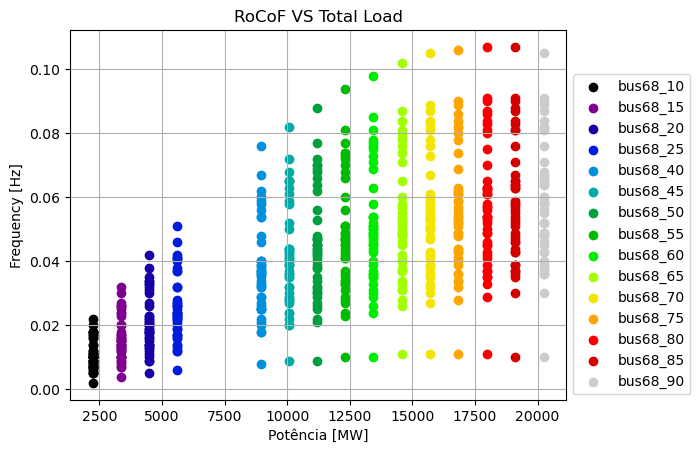

In [ ]:
colormap = plt.cm.nipy_spectral
colors   = [colormap(i) for i in np.linspace(0, 1, len(complete['File'].unique()))]
    
for idx, file in enumerate(complete['File'].unique()):
    
    filtro = complete['File'] == file
    
    plt.scatter(complete[filtro]['PGTM_value0'], complete[filtro]['RoCoF'], color=colors[idx], label=str(file))
    
plt.title('RoCoF VS Total Load')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Potência [MW]')
plt.grid()
    
plt.legend(loc='best', bbox_to_anchor=(1, 0.9))
plt.show()

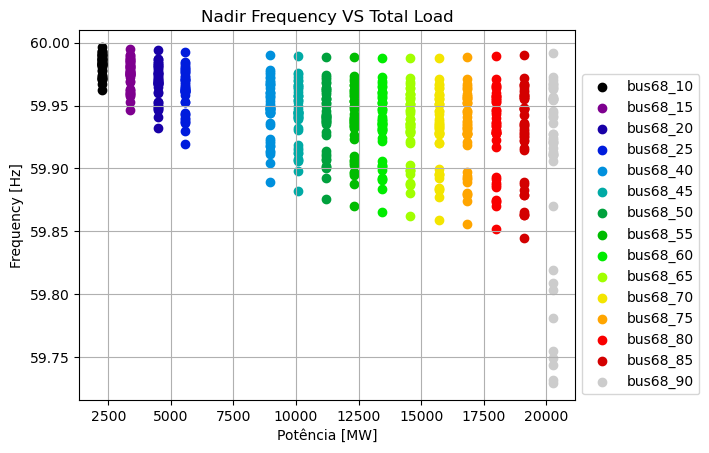

In [ ]:
colormap = plt.cm.nipy_spectral
colors   = [colormap(i) for i in np.linspace(0, 1, len(complete['File'].unique()))]
    
for idx, file in enumerate(complete['File'].unique()):
    
    filtro = complete['File'] == file
    
    plt.scatter(complete[filtro]['PGTM_value0'], 60-complete[filtro]['NDRC_hz'], color=colors[idx], label=str(file))
    
plt.title('Nadir Frequency VS Total Load')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Potência [MW]')
plt.grid()    

plt.legend(loc='best', bbox_to_anchor=(1, 0.9))
plt.show()

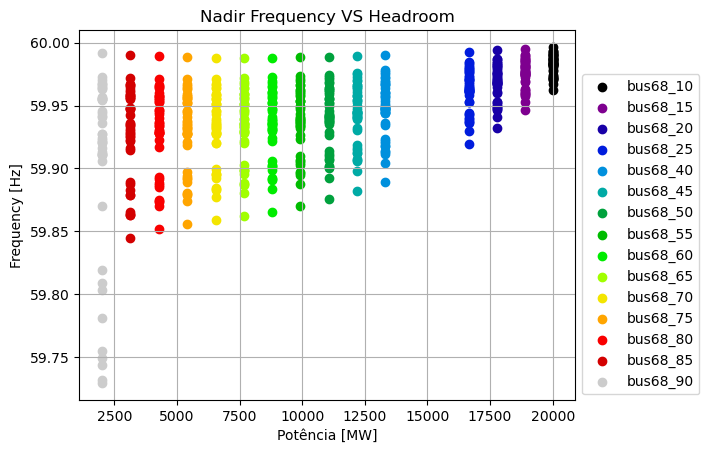

In [ ]:
colormap = plt.cm.nipy_spectral
colors   = [colormap(i) for i in np.linspace(0, 1, len(complete['File'].unique()))]
    
for idx, file in enumerate(complete['File'].unique()):
    
    filtro = complete['File'] == file
    
    plt.scatter(ND.total_PMAX_MW-complete[filtro]['PGTM_value0'], 60-complete[filtro]['NDRC_hz'], color=colors[idx], label=str(file))
    
plt.title('Nadir Frequency VS Headroom')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Potência [MW]')
plt.grid()

plt.legend(loc='best', bbox_to_anchor=(1, 0.9))
plt.show()

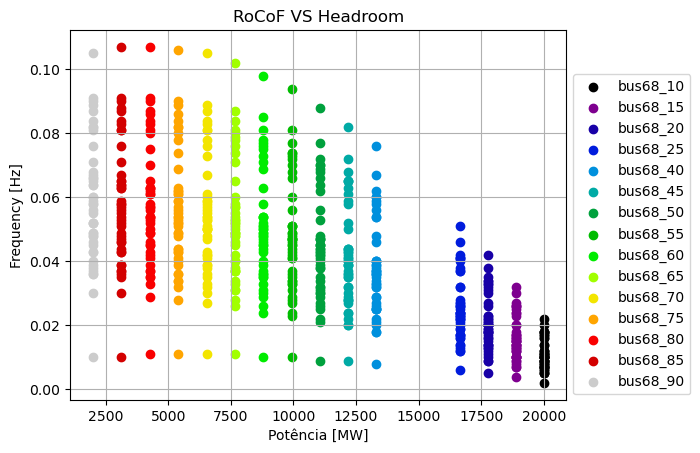

In [ ]:
colormap = plt.cm.nipy_spectral
colors   = [colormap(i) for i in np.linspace(0, 1, len(complete['File'].unique()))]
    
for idx, file in enumerate(complete['File'].unique()):
    
    filtro = complete['File'] == file
    
    plt.scatter(ND.total_PMAX_MW-complete[filtro]['PGTM_value0'], complete[filtro]['RoCoF'], color=colors[idx], label=str(file))
    
plt.title('RoCoF VS Headroom')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Potência [MW]')
plt.grid()
    
plt.legend(loc='best', bbox_to_anchor=(1, 0.9))
plt.show()

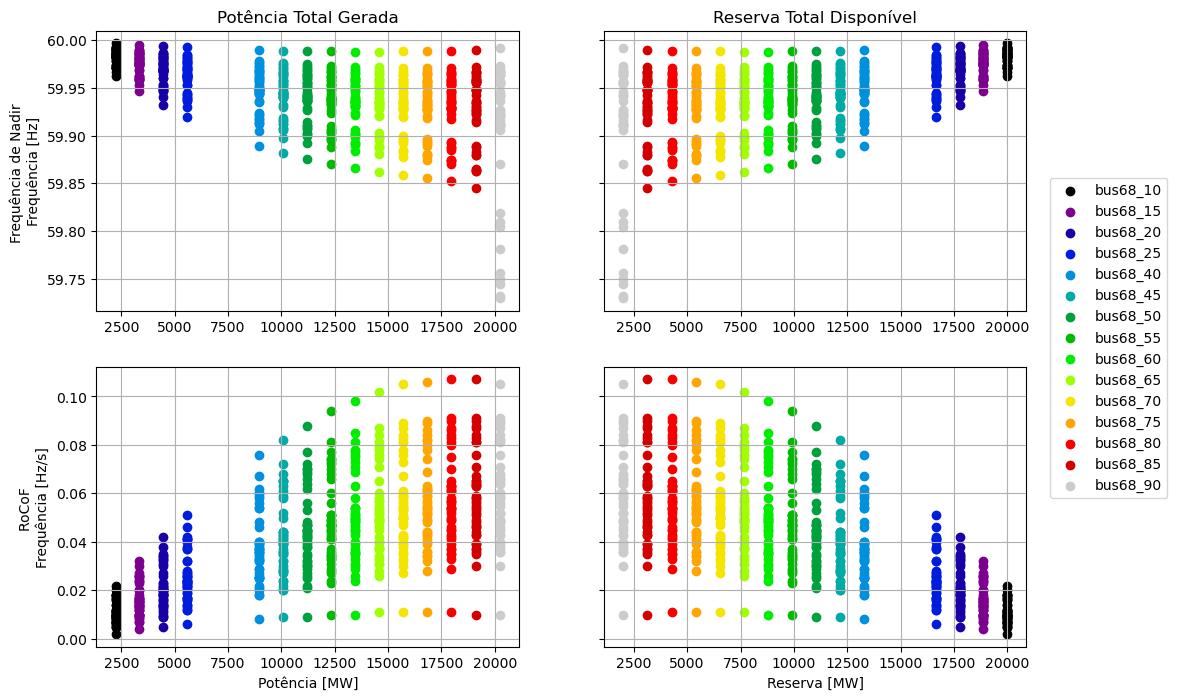

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,8), sharey='row')

for idx, file in enumerate(complete['File'].unique()):
    
    filtro = complete['File'] == file

    ax[0, 0].scatter(complete[filtro]['PGTM_value0'], 60-complete[filtro]['NDRC_hz'], color=colors[idx], label=str(file))
    ax[0, 0].ticklabel_format(useOffset=False)
    ax[0, 0].grid(True)
    
    ax[0, 1].scatter(ND.total_PMAX_MW-complete[filtro]['PGTM_value0'], 60-complete[filtro]['NDRC_hz'], color=colors[idx], label=str(file))
    ax[0, 1].ticklabel_format(useOffset=False)
    ax[0, 1].grid(True)
    
    ax[1, 0].scatter(complete[filtro]['PGTM_value0'], complete[filtro]['RoCoF'], color=colors[idx], label=str(file))
    ax[1, 0].ticklabel_format(useOffset=False)
    ax[1, 0].grid(True)
    
    ax[1, 1].scatter(ND.total_PMAX_MW-complete[filtro]['PGTM_value0'], complete[filtro]['RoCoF'], color=colors[idx], label=str(file))
    ax[1, 1].ticklabel_format(useOffset=False)
    ax[1, 1].grid(True)

ax[0, 0].set_title('Potência Total Gerada')  
ax[0, 1].set_title('Reserva Total Disponível')  

ax[0, 0].set_ylabel("Frequência de Nadir \nFrequência [Hz]")
ax[1, 0].set_ylabel("RoCoF \nFrequência [Hz/s]")

ax[1, 0].set_xlabel('Potência [MW]')
ax[1, 1].set_xlabel("Reserva [MW]")

ax[1, 1].legend(loc='best', bbox_to_anchor=(1.35, 1.7))


plt.show()

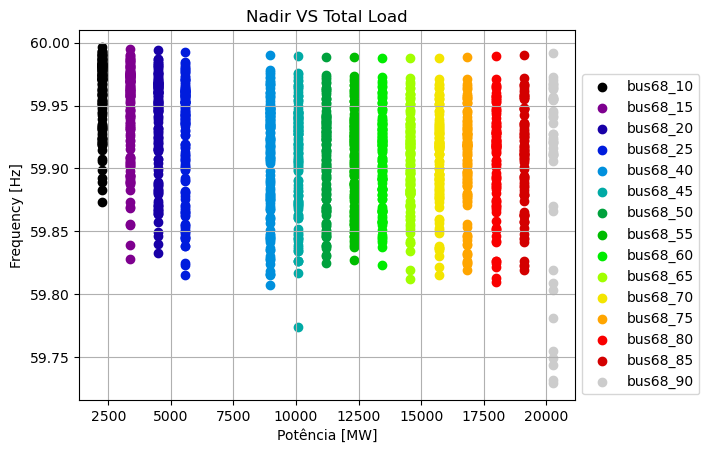

In [ ]:
colormap = plt.cm.nipy_spectral
colors   = [colormap(i) for i in np.linspace(0, 1, len(data['File'].unique()))]
    
for idx, file in enumerate(data['File'].unique()):
    
    filtro = data['File'] == file
    
    plt.scatter(data[filtro]['PGTM_value0'], 60-data[filtro]['NDRC_hz'], color=colors[idx], label=str(file))
    
plt.title('Nadir VS Total Load')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Potência [MW]')
plt.grid()
    
plt.legend(loc='best', bbox_to_anchor=(1, 0.9))
plt.show()